# Project: Analysis on missed medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

This dataset contains information about 100,000 medical appointments scheduled, missed and/or attended by the patients in Brazil. An analysis is conducted to ascertain the reason(s) behind the missed appointments (which account for 20% of the appointments scheduled at this clinic). The dependent variable is called **"No Show"**, responses say if a patient missed their appointment or not ("Yes" or "No").

There are several other variables, relevant medical information, which may have resulted in, or have a correlation with, a patient's inability to meet up on the scheduled day. These independent variables include:

1. **Identification numbers** for the patient and fixed appointments
2. **Gender**: The gender distribution of patients
3. **Age**: Ages of the patients
4. **Neighborhood**: The neighborhoods in which the clinics are located
5. **Scholarship**: Indicates whether or not the patient is enrolled in Brasilian welfare program "Bolsa Família".
6. **Scheduled day**: The day on which the patient called to fix an appointment.
7. **Appointment day**:The actual day fixed for the medical appointment.
8. **Disabilities and other known ailments**, displayed in boolean (1 for True and 0 for False) such as:
       a. Hypertension
       b. Diabetes
       c. Alcoholism
       d. Is the patient handicap?
9. **SMS**: 1 or more messages sent to the patient.



### Question(s) for Analysis
A few questions that would be explored are:
1. Are the age (ranges) and gender of the patients related to the amount of missed appointments?
2. Is there too much wait time between the scheduling and appointments dates? Could this be contributing to the no shows?
3. Do more patients under scholarships set up and miss their appointments?
4. Could the clinics in certain locations be experiencing more missed appointments?
 

In [66]:
#import relevant packages here:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# Upgrade pandas (to the 0.25.1 version) to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1;

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


In [67]:
# load the dataframe, indictaing the separator
df=pd.read_csv('noshowappts.csv', sep=',')

<a id='wrangling'></a>
## Data Wrangling

In [68]:
#Load the first five lines of the dataset to examine
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
#explore the dimensions and datatypes using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [70]:
#summary stats about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


### Initial Thoughts
1. The average, min and max ages are 37, -1 and 115 years. 
        a. The negative value needs to be further looked into.
2. The percentage of handicapped people is small, at 40.
3. The proportion of people to whom messages were delivered is less than the average
4. The percentage of people who suffer from chronic ailments, and are addicted to alcohol, is small

## *Cleaning Note*

From the data frame information derived above, we see that:
1. there are no rows with missing information
2. the patient IDs have been stored as floating point numbers
3. Both the scheduled and appointment days need to be converted to either DATETIME or TIME
4. Do the 0s and 1s need to be converted to True or False?
5. Adjust column names

### Clean the columns
1. First, put all column names in lower case
2. Replace dashes(-) with underscores (_)
3. Place underscore in between column names 1, 2, 4, 5, 9. That is:
       a. PatientId ---> patient_id
       b. AppointmentId ---> appointment_id
       c. ScheduledDay ---> scheduled_day
       d. AppointmentDay ---> appointment_day
       e. Hipertension ---> Hypertension
       f. Handcap ---> Handicap
4. Drop columns irrelevant to the analysis

###### Column clean 1

In [95]:
df=df.rename(columns=str.lower)
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_date,appointment_day_date,lead_time
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


###### Column clean 2

In [96]:
# Replace dashes
df.columns= df.columns.str.replace('-', '_')
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_date,appointment_day_date,lead_time
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


###### Column clean 3

In [97]:
#adjust column names 1,2,4,5,9
df.rename(columns={"patientid": "patient_id", "appointmentid":"appointment_id", "scheduledday":"scheduled_day", "appointmentday":"appointment_day", "hipertension":"hypertension"}, inplace=True)

In [98]:
#adjust column name 13
df.rename(columns={"handcap": "handicap"}, inplace=True)

###### Column clean 4

In [99]:
#Drop specific irrelevant columns
df.drop(['appointment_id'], axis = 1, inplace = True)
df.head()

KeyError: "['appointment_id'] not found in axis"

### Convert scheduled_day and appointment_day to DATE data types

In [100]:
#convert the dates of scheduling to DATETIME, then pull out the actual DATE
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['scheduled_day_date']=df['scheduled_day'].dt.date

In [101]:
#convert the appointment dates to DATETIME, then pull out the actual DATE
df['appointment_day']=pd.to_datetime(df['appointment_day'])
df['appointment_day_date']=df['appointment_day'].dt.date

In [102]:
#the lead time is the amount of days between date of scheduling and appointment.
df['lead_time']=(df['appointment_day_date']-df['scheduled_day_date']).dt.days
#convert to integer
df['lead_time']=df['lead_time'].astype(int)

In [103]:
df.lead_time.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time, dtype: float64

The average , max and min lead time (in days) for patients was 10, 179 and -6 days respectively

In [104]:
df.tail()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_date,appointment_day_date,lead_time
110522,2.572134e+12,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,2016-06-07,35
110523,3.596266e+12,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,2016-06-07,35
110524,1.557663e+13,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,2016-06-07,41
110525,9.213493e+13,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,2016-06-07,41
110526,3.775115e+14,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,2016-06-07,41


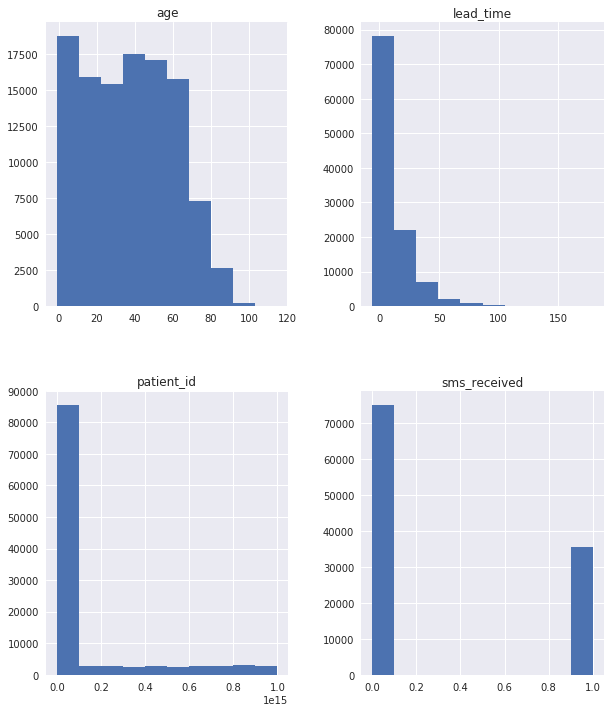

In [105]:
#plot a histogram of the dataset
df.hist(figsize=(10,12));

#### How many patients missed/attended their medical appointments?

#### Age Information

In [106]:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### A box plot and histogram to show the distribution of the ages

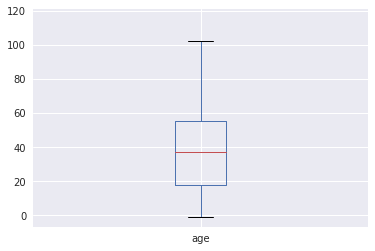

In [107]:
sns.set()
df['age'].plot(y= 'age',kind='box');

After plotting the box plot to show the age distribution, we see that the max of 115 years is an outlier.
The min age of -1 is unrealistic and needs to be dropped

In [14]:
df.drop(df[(df['age']<0)].index,axis=0,inplace=True)

#recheck
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

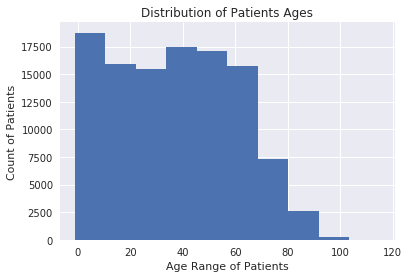

In [108]:
sns.set()
df['age'].plot(x='age', kind='hist', figsize=(6,4))
plt.ylabel('Count of Patients')
plt.xlabel('Age Range of Patients')
plt.title('Distribution of Patients Ages');

The histogram above depicts the age distribution of the patients

#### Gender Display

In [20]:
df.groupby('gender')['patient_id'].count()

gender
F    71839
M    38687
Name: patient_id, dtype: int64

In [25]:
df.gender.describe()

count     110526
unique         2
top            F
freq       71839
Name: gender, dtype: object

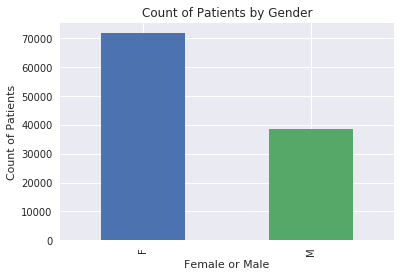

In [32]:
sns.set()
df['gender'].value_counts().plot(kind='bar', figsize=(6,4))
plt.ylabel('Count of Patients')
plt.xlabel('Female or Male')
plt.title('Count of Patients by Gender');

In the bar chart displayed above, We can see that there are nearly 2 women for every 1 man

In [35]:
round(df.gender.value_counts()/len(df)*100)

F    65.0
M    35.0
Name: gender, dtype: float64

#### Information on the Neighbourhood

In [21]:
df.neighbourhood.describe()

count             110526
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

There are 81 unique neighbouhoods present in this dataset, the top being Jardim Camburi which appears 7,717 times

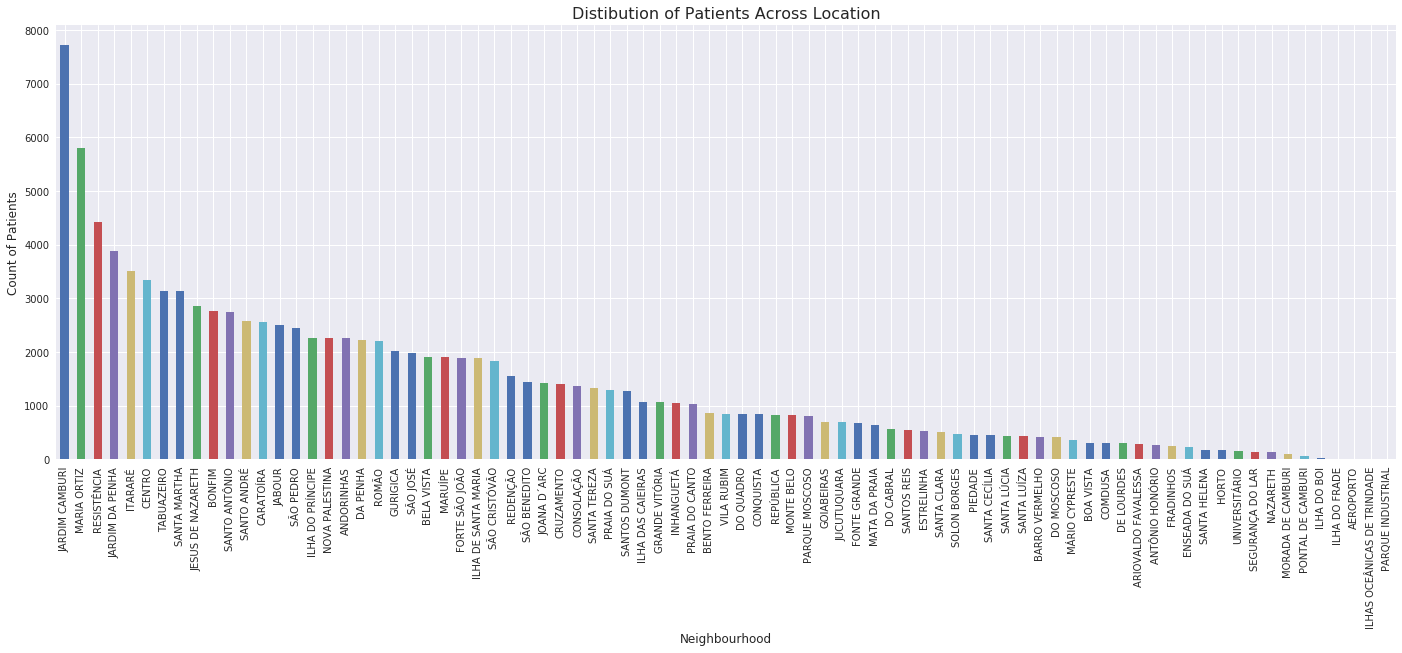

In [22]:
sns.set()
df['neighbourhood'].value_counts().plot(x='neighborhood', kind='bar', figsize=(24,8))
plt.ylabel('Count of Patients', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)
plt.title('Distibution of Patients Across Location', fontsize=16);

The bar chart is used to visualize the distribution of patients across the different hospital locations

#### Information on the Medical Scholarship Plan

In [30]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

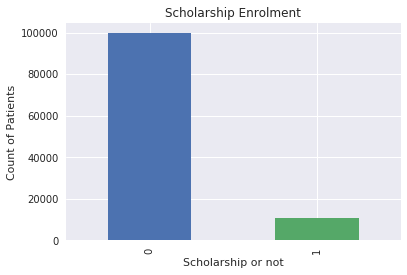

In [23]:
sns.set()
df['scholarship'].value_counts().plot(x='scholarship', kind='bar', figsize=(6,4))
plt.ylabel('Count of Patients')
plt.xlabel('Scholarship or not')
plt.title('Scholarship Enrolment');

The viz above is a bar chart used to visualise the counts of patients who were enrolled (or not) on "Bolsa Família".

We see that there were 99,666 patients who were not enrolled on the government medical scholarship, while the rest were

#### Information on patients with hypertension

In [24]:
df.hypertension.value_counts(normalize=True)

0    0.802752
1    0.197248
Name: hypertension, dtype: float64

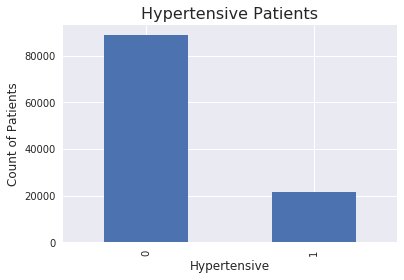

In [34]:
sns.set()
df['hypertension'].value_counts().plot(x='hypertension', kind='bar', figsize=(6,4))
plt.ylabel('Count of Patients', fontsize=12)
plt.xlabel('Hypertensive', fontsize=12)
plt.title('Hypertensive Patients', fontsize=16);

A bar chart to show which patients are hypertensive and which are not.

#### Information on patients treating diabetes

In [35]:
df.diabetes.value_counts(normalize=True)

0    0.928135
1    0.071865
Name: diabetes, dtype: float64

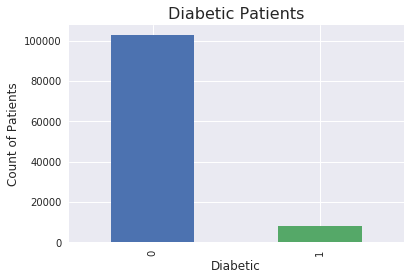

In [25]:
sns.set()
df['diabetes'].value_counts().plot(x='diabetes', kind='bar', figsize=(6,4))
plt.ylabel('Count of Patients', fontsize=12)
plt.xlabel('Diabetic', fontsize=12)
plt.title('Diabetic Patients', fontsize=16);

A bar chart to show which patients are diabetic and which are not.

#### Information on patients battling alcoholism

In [37]:
df.alcoholism.value_counts(normalize=True)

0    0.9696
1    0.0304
Name: alcoholism, dtype: float64

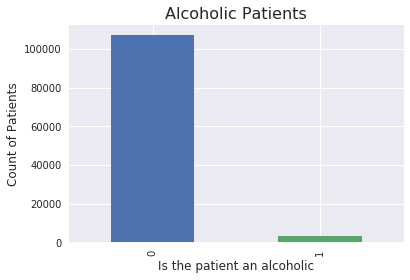

In [26]:
sns.set()
df['alcoholism'].value_counts().plot(x='alcoholism', kind='bar', figsize=(6,4))
plt.ylabel('Count of Patients', fontsize=12)
plt.xlabel('Is the patient an alcoholic', fontsize=12)
plt.title('Alcoholic Patients', fontsize=16);

The bar chart above shows that 97% of the patients do not struggle with alcoholism.

#### Information on disabled patients

In [39]:
df.handicap.nunique()

5

In [27]:
df.groupby('gender')['handicap'].value_counts(normalize=True)

gender  handicap
F       0           0.982043
        1           0.016440
        2           0.001462
        3           0.000042
        4           0.000014
M       0           0.975418
        1           0.022256
        2           0.002016
        3           0.000258
        4           0.000052
Name: handicap, dtype: float64

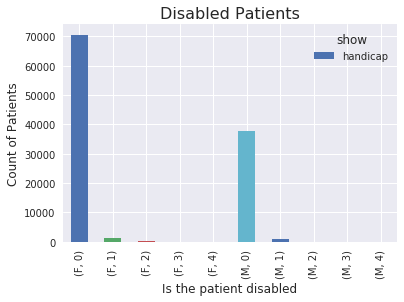

In [35]:
sns.set()
df.groupby('gender')['handicap'].value_counts().plot(x='handicap', kind='bar', figsize=(6,4))
plt.ylabel('Count of Patients', fontsize=12)
plt.xlabel('Is the patient disabled', fontsize=12)
plt.title('Disabled Patients', fontsize=16)
plt.legend(title = 'show');

A bar chart to show which patients, grouped by gender, are disabled and those that are not.

##### Observations about ailments
1. 98.2% and 97.5% percent, of the female and male respectively, patients are not handicap
2. There are 4 times more patients without hypertension (at 80%)
3. 7% of the patients have diabetes
4. 97% of the patients do not have suffer from alcoholism

#### Patients that recieved SMS(s)

In [43]:
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

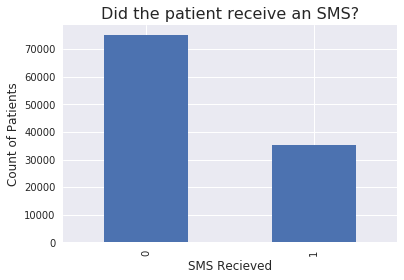

In [44]:
sns.set()
df['sms_received'].value_counts().plot(x='sms_received', kind='bar', figsize=(6,4))
plt.ylabel('Count of Patients', fontsize=12)
plt.xlabel('SMS Recieved', fontsize=12)
plt.title('Did the patient receive an SMS?', fontsize=16);

From the bar chart above, we can say that 75,045 patients (at 68%) received SMS from the clinic

#### Information on attendance

In [109]:
df['no_show']=df['no_show'].astype('category')
df['no_show']=df['no_show'].cat.codes
df['no_show'].dtypes

dtype('int8')

In [110]:
#Create masks for rows where patients missed or attended their appointments
missed = df.no_show == True
attended = df.no_show == False

In [111]:
#a summative count of "no" and "yes"
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

There were 88,208 patients who met the appointments, while 22,319 did not show up

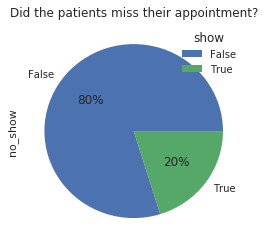

In [112]:
#a bar chart of the counts
df.no_show.value_counts().plot(kind='pie',labels= ["False", "True"],figsize=(4,4), autopct='%1.0f%%')
plt.title('Did the patients miss their appointment?')
plt.legend(title = 'show');

The bar chart shows that a larger portion of the patients who scheduled appointments showed up.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

#### A function to convert data types of one or more specified columns

In [122]:
def convert_type(variables: list, type_to: str):  
    for variables in variables:
        df[f"{variables}"] = df[f"{variables}"].astype(type_to)

The parameters are:
* variables: list type
* type_to: string type

Convert the listed columns to strings

In [126]:
variables = ["patient_id","scholarship", "hypertension", "diabetes", "alcoholism", "handicap", "no_show"]

convert_type(variables, "str")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
patient_id              110527 non-null object
gender                  110527 non-null object
scheduled_day           110527 non-null datetime64[ns]
appointment_day         110527 non-null datetime64[ns]
age                     110527 non-null int64
neighbourhood           110527 non-null object
scholarship             110527 non-null object
hypertension            110527 non-null object
diabetes                110527 non-null object
alcoholism              110527 non-null object
handicap                110527 non-null object
sms_received            110527 non-null int64
no_show                 110527 non-null object
scheduled_day_date      110527 non-null object
appointment_day_date    110527 non-null object
lead_time               110527 non-null int64
dtypes: datetime64[ns](2), int64(3), object(11)
memory usage: 13.5+ MB


In [124]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_date,appointment_day_date,lead_time
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0


#### Do the age ranges and/or genders have a relationship with no-shows?

In [114]:
attended_mean=df.age[attended].mean()
attended_mean

37.790064393252315

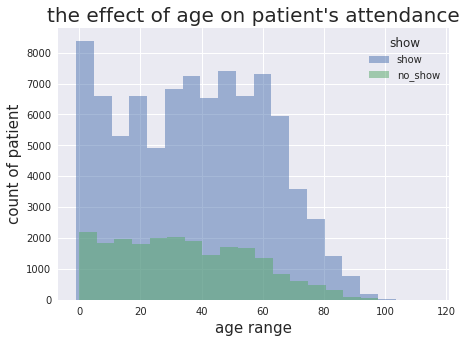

In [115]:
#Plot a histogram to compare the age ranges and missed appointments
sns.set()
plt.subplots(figsize=(7,5))
df.age[attended].hist(alpha=0.5, bins=20, label='show')
df.age[missed].hist(alpha=0.5, bins=20, label='no_show')
plt.legend(title = 'show')
plt.xlabel('age range',fontsize=15)
plt.ylabel('count of patient',fontsize=15)
plt.title('the effect of age on patient\'s attendance', fontsize=20);

##### Conclusion on Age
From the figure above, we see that
1. There is a downward trend in attendance, as soon as patients hit 60 years. Otherwise, there isn't that much of a correlation.

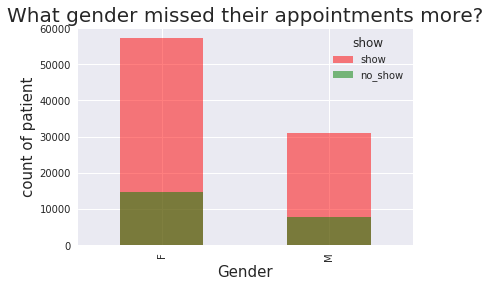

In [121]:
#Plot a histogram to compare the genders and missed appointments
sns.set()
plt.subplots(figsize=(6,4))
df.gender[attended].value_counts().plot(kind='bar', alpha=0.5, color='red', label='show')
df.gender[missed].value_counts().plot(kind='bar', alpha=0.5, color='green', label='no_show')
plt.legend(title = 'show')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count of patient',fontsize=15)
plt.title('What gender missed their appointments more?', fontsize=20);

##### Conclusion on Gender
1. There are more females setting up appointments (as earlier stipulated), about a fourth tend to miss their appointments.
2. At just under half the number of females fixing medical appointments, a third of the men do not show up for their appointments

### Does the clinic location affect attendance?

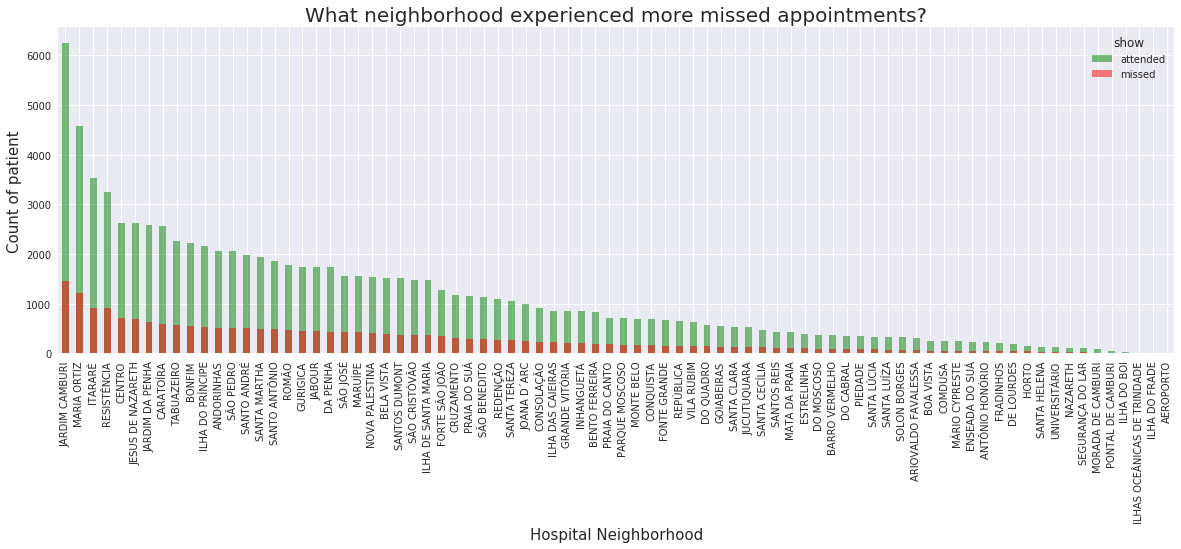

In [43]:
#Plot a histogram to compare the appointments across the different locations
sns.set()
plt.subplots(figsize=(20,6))
df.neighbourhood[attended].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='attended')
df.neighbourhood[missed].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='missed')
plt.legend(title = 'show')
plt.xlabel('Hospital Neighborhood',fontsize=15)
plt.ylabel('Count of patient',fontsize=15)
plt.title('What neighborhood experienced more missed appointments?', fontsize=20);

##### Conclusion on Neighbourhoods
1. For every 1000 appointments that were scheduled and attended, there were roughly 250 missed medical appointments. This seemed to be the trend across all the neighborhoods.
2. There doesn't seem to be particular neighborhoods with higher no-shows, as the rate of attendance varied.


### Does the lead time affect attendance?

In [129]:
df.lead_time.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time, dtype: float64

In [108]:
#see rows that default
wrong_dates=df[df['lead_time'] <0]
wrong_dates

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_date,appointment_day_date,lead_time
27033,7.839273e+12,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,2016-05-10,2016-05-09,-1
55226,7.896294e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,2016-05-18,2016-05-17,-1
64175,2.425226e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,2016-05-05,2016-05-04,-1
71533,9.982316e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,2016-05-11,2016-05-05,-6
72362,3.787482e+12,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,2016-05-04,2016-05-03,-1


There are 5 instances where the scheduled_day was later than the appointment_day; this is unrealistic, and could have been due to human error. I will be dropping those rows.

In [45]:
df.drop(df[(df['lead_time']<0)].index,axis=0,inplace=True)

#recheck
df.lead_time.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time, dtype: float64

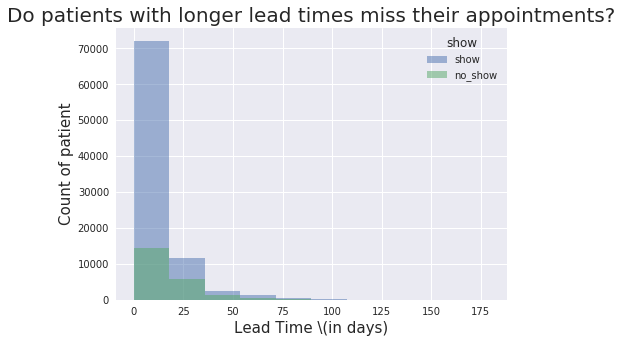

In [46]:
#Plot a histogram to show the effect of lead time (in days) on attendance
sns.set()
plt.subplots(figsize=(7,5))
df.lead_time[attended].hist(alpha=0.5, label='show')
df.lead_time[missed].hist(alpha=0.5,label='no_show')
plt.legend(title = 'show')
plt.xlabel('Lead Time \(in days)',fontsize=15)
plt.ylabel('Count of patient',fontsize=15)
plt.title('Do patients with longer lead times miss their appointments?', fontsize=20);

##### Conclusion on Lead times
1. The most a patient had to wait was 179 days
2. We can see that there were more no_shows for patients who waited between 0 and 35 days. In essence, the longer the lead time, the lower the number of missed appointments.

### Does enrolment on Bolsa Família have an effect attendance?

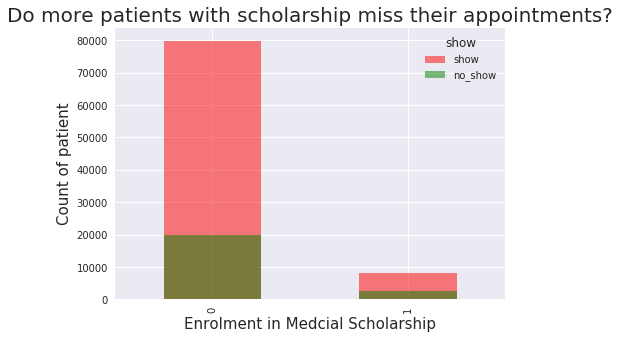

In [130]:
#Plot a histogram to show the effect of the medical scholarship on attendance
sns.set()
plt.subplots(figsize=(7,5))
df.scholarship[attended].value_counts().plot(kind='bar', alpha=0.5, color='red', label='show')
df.scholarship[missed].value_counts().plot(kind='bar', alpha=0.5, color='green', label='no_show')
plt.legend(title = 'show')
plt.xlabel('Enrolment in Medcial Scholarship',fontsize=15)
plt.ylabel('Count of patient',fontsize=15)
plt.title('Do more patients with scholarship miss their appointments?', fontsize=20);

##### Conclusions on Medical scholarship
1. For patients who were not enrolled on the scholarship, about 25% of them did not show up to their appointments.
2. The same applied for those on the scholarship.

<a id='conclusions'></a>
## Final Conclusions

1. With respest to gender, there are ordinarily more female patients than male; this could have a part to play in the percentage of female no_shows being higher.
2. The hospital locations are widely spread, each with their rate of sign-ups, attendance and no_shows. The attendance/no_shows at Jardin Camburi have no relationship with that of Piedade.


### Limitations
Some limitations found within these dataset include:
1. The inconsistencies between the schedule and appointment days, in ensuring that the latter came after the former.
2. There was an instance of a less than 1 (in years) entered as a patient's age.
3. The difference in data collected for women vs. men was large. We need to ensure that there was no bias or judgement involved.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [131]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0